In [73]:
from scipy.stats import uniform, norm

from isochrones import get_ichrone
from isochrones.priors import ChabrierPrior, FehPrior, GaussianPrior, SalpeterPrior
from isochrones.populations import StarFormationHistory, StarPopulation, BinaryDistribution

mist = get_ichrone('mist')
sfh = StarFormationHistory()  # Constant SFR for 10 Gyr; or, e.g., dist=norm(3, 0.2)
imf = SalpeterPrior(bounds=(0.4, 10))  # bounds on solar masses
binaries = BinaryDistribution(fB=0.4, gamma=0.3)
# feh = FehPrior(halo_fraction=0.2)
feh = GaussianPrior(-0.2, 0.2)
distance = 10  # pc  (or this can be an isochrones.prior.Prior object, or anything with a "sample" method, really)
AV = 0.  # Same rules as distance

pop = StarPopulation(mist, sfh=sfh, imf=imf, feh=feh, distance=distance, binary_distribution=binaries, AV=AV)

# df = pop.generate(1e3)

In [74]:
df = pop.generate(1e4)

In [75]:
mass_cols = [c for c in df.columns if 'mass' in c]

In [76]:
mag_cols = [c for c in df.columns if 'mag' in c]
df[mass_cols + mag_cols].describe()

/Users/tmorton/miniconda3/envs/isochrones-test/lib/python3.7/site-packages/numpy/lib/function_base.py:3949: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


mass  initial_mass       mass_B        J_mag        H_mag  \
count  10000.000000  10000.000000  3938.000000  9999.000000  9999.000000   
mean       0.670888      0.670975     0.428296     5.339271     4.767139   
std        0.292004      0.292151     0.245443     1.460956     1.324058   
min        0.399996      0.400000     0.101230    -5.091975    -6.054811   
25%        0.473648      0.473652     0.265326     4.474589     3.998677   
50%        0.586246      0.586269     0.378535     5.725333     5.031172   
75%        0.780530      0.780567     0.525220     6.485865     5.808241   
max        6.111001      6.112195     3.643369     7.241765     6.599492   

             K_mag        G_mag       BP_mag       RP_mag       W1_mag  ...  \
count  9999.000000  9999.000000  9999.000000  9999.000000  9999.000000  ...   
mean      4.645084     7.051012     7.724003     6.305132     4.585235  ...   
std       1.268399     1.967236     2.233799     1.766639     1.236600  ...   
min      -6.230790    -2.808600    -1.868095    -3.734814    -6.281676  ...   
25%       3.936631     5.760916     6.173486     5.175456     3.912262  ...   
50%       4.899170     7.612039     8.350696     6.794613     4.838975  ...   
75%       5.627971     8.648839     9.559601     7.726712     5.527412  ...   
max       6.397824    10.380225    12.051508     9.196850     6.299183  ...   

           W1_mag_A     W1_mag_B      W2_mag_A     W2_mag_B      W3_mag_A  \
count  10000.000000  9999.000000  10000.000000  9999.000000  10000.000000   
mean       4.714670          inf      4.706765          inf      4.624230   
std        1.232732          NaN      1.204002          NaN      1.175010   
min       -6.281676    -0.102994     -6.168032    -0.088654     -6.331509   
25%        4.059264     6.665550      4.095503     6.540160      4.037738   
50%        4.968868          NaN      4.997543          NaN      4.889936   
75%        5.694469          inf      5.642365          inf      5.534702   
max        6.309124          inf      6.162478          inf      6.057223   

          W3_mag_B    TESS_mag_A   TESS_mag_B  Kepler_mag_A  Kepler_mag_B  
count  9999.000000  10000.000000  9999.000000  10000.000000   9999.000000  
mean           inf      6.387119          inf      7.071948           inf  
std            NaN      1.759946          NaN      1.981226           NaN  
min      -0.066813     -3.771154    -0.376172     -2.881644     -0.459579  
25%       6.430966      5.255225     9.002746      5.738691     10.013641  
50%            NaN      6.891074          NaN      7.631786           NaN  
75%            inf      7.836016          inf      8.716225           inf  
max            inf      9.072022          inf     10.450276           inf  

[8 rows x 36 columns]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
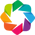

:Layout
   .Scatter.I  :Scatter   [G-J]   (G_mag,feh,mass,age,radius)
   .Scatter.II :Scatter   [G-J]   (G_mag,age,mass,radius)

In [77]:
import holoviews as hv
hv.extension('bokeh')
import hvplot.pandas

df['G-J'] = df.G_mag - df.J_mag

hover_cols = ['mass', 'age', 'radius']
options = dict(invert_yaxis=True)
hv.Layout([df.hvplot.scatter('G-J', 'G_mag', size=4, alpha=0.5, color='feh', cmap='viridis', hover_cols=hover_cols).options(**options), 
           df.hvplot.scatter('G-J', 'G_mag', size=4, alpha=0.5, color='age', cmap='viridis', hover_cols=hover_cols).options(**options)]).cols(1)